# Banking Case Study

### Problem Statement - Given various features about a customer like Age, Income, Loan Amount, Loan Intent, Home Ownership etc.. , predict if in case the loan is given, will the customer default or not on the Loan payments.


In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [82]:
import warnings
warnings.filterwarnings('ignore')

In [83]:
data = pd.read_csv(r"C:\Users\k.udaya shree\Downloads\credit_risk_dataset.csv")

In [84]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


person_age: Age

person_income: Annual Income

person_home_ownership: Home ownership

person_emp_length: Employment length (in years)

loan_intent: Loan intent

loan_grade: Loan grade

loan_amnt: Loan amount

loan_int_rate: Interest rate

loan_status: Loan status (0 is non default 1 is default)

loan_percent_income: Percent income

cb_person_default_on_file: Historical default

cb_preson_cred_hist_length: Credit history length

### Analysing the data stats

In [85]:
data.shape

(32581, 12)

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [87]:
data.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

<AxesSubplot:xlabel='person_emp_length', ylabel='Density'>

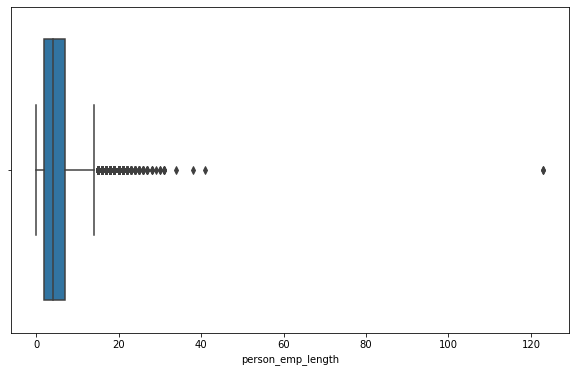

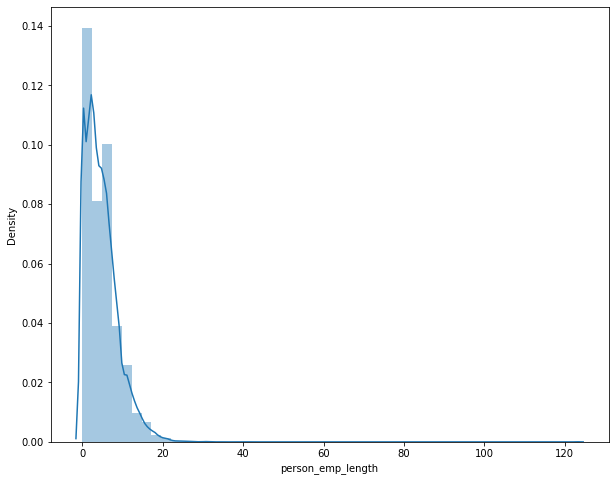

In [88]:
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(data.person_emp_length)

fig, ax = plt.subplots(figsize=(10,8))
sns.distplot(data.person_emp_length)

In [89]:
data['person_emp_length'] = data['person_emp_length'].fillna(data['person_emp_length'].median())

In [90]:
data.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length                0
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

<AxesSubplot:xlabel='loan_int_rate', ylabel='Density'>

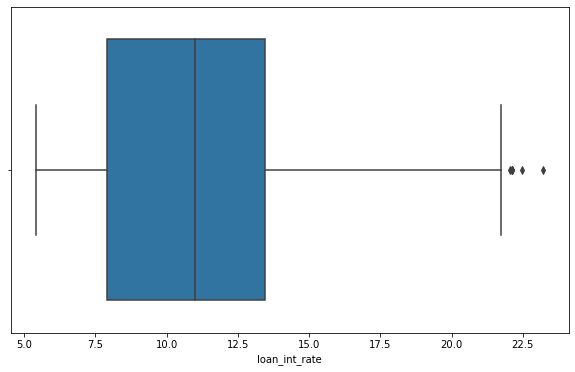

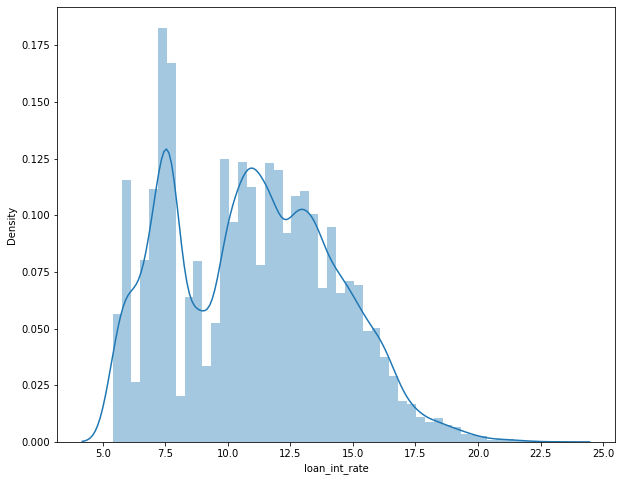

In [91]:
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(data.loan_int_rate)

fig, ax = plt.subplots(figsize=(10,8))
sns.distplot(data.loan_int_rate)

In [92]:
data['loan_int_rate'] = data['loan_int_rate'].fillna(data['loan_int_rate'].median())

In [93]:
data.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

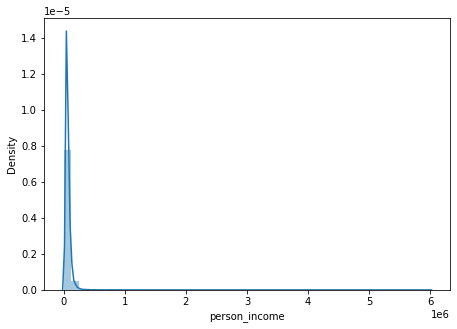

In [94]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,2)
sns.distplot(data['person_income'])

plt.show()

In [95]:
data['person_income'].describe()

count    3.258100e+04
mean     6.607485e+04
std      6.198312e+04
min      4.000000e+03
25%      3.850000e+04
50%      5.500000e+04
75%      7.920000e+04
max      6.000000e+06
Name: person_income, dtype: float64

<AxesSubplot:xlabel='person_income'>

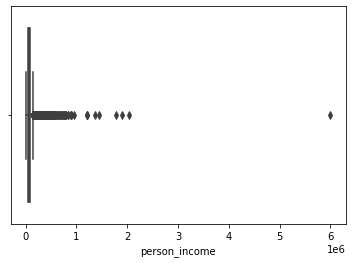

In [96]:
sns.boxplot(data['person_income'])

In [97]:
#Finding the iqr
percentile25 = data['person_income'].quantile(0.25)
percentile75 = data['person_income'].quantile(0.75)

In [98]:
iqr = percentile75 - percentile25
iqr

40700.0

In [99]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Upper limit", upper_limit)
print("Lower limit", lower_limit)

Upper limit 140250.0
Lower limit -22550.0


In [100]:
data[data['person_income'] > upper_limit]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
15,23,500000,MORTGAGE,7.0,DEBTCONSOLIDATION,B,30000,10.65,0,0.06,N,3
20,25,162500,RENT,2.0,VENTURE,A,35000,7.49,0,0.22,N,4
33,25,306000,RENT,2.0,DEBTCONSOLIDATION,C,24250,13.85,0,0.08,N,3
34,26,300000,MORTGAGE,10.0,MEDICAL,C,7800,13.49,0,0.03,N,4
42,26,300000,MORTGAGE,10.0,VENTURE,A,20000,7.88,0,0.07,N,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32544,58,780000,MORTGAGE,7.0,PERSONAL,A,4500,6.91,0,0.01,N,20
32546,60,1900000,MORTGAGE,5.0,PERSONAL,A,1500,10.99,0,0.00,N,21
32551,58,780000,MORTGAGE,7.0,PERSONAL,A,4500,6.91,0,0.01,N,19
32562,61,160000,MORTGAGE,30.0,PERSONAL,B,24000,10.38,0,0.15,N,21


In [101]:
data[data['person_income'] < lower_limit]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length


In [102]:
new_data_cap = data.copy()

new_data_cap['person_income'] = np.where(new_data_cap['person_income'] > upper_limit, upper_limit, 
                                np.where(new_data_cap['person_income'] < lower_limit, lower_limit,
                                         new_data_cap['person_income']))

In [103]:
new_data_cap.shape

(32581, 12)

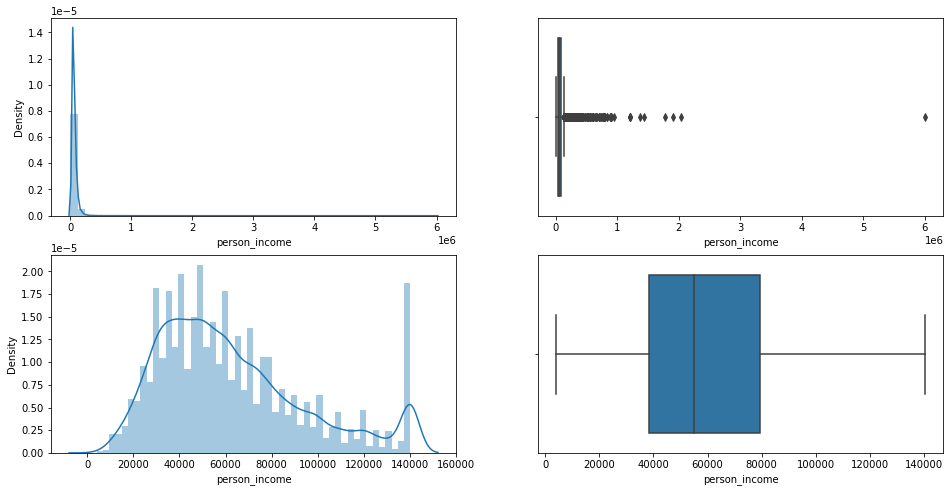

In [104]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data['person_income'])

plt.subplot(2,2,2)
sns.boxplot(data['person_income'])

plt.subplot(2,2,3)
sns.distplot(new_data_cap['person_income'])

plt.subplot(2,2,4)
sns.boxplot(new_data_cap['person_income'])

plt.show()

In [105]:
new_data_cap.loan_status.value_counts()

0    25473
1     7108
Name: loan_status, dtype: int64

<AxesSubplot:xlabel='person_emp_length'>

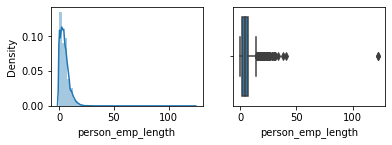

In [106]:
plt.subplot(2,2,3)
sns.distplot(new_data_cap['person_emp_length'])

plt.subplot(2,2,4)
sns.boxplot(new_data_cap['person_emp_length'])

In [107]:
percentile25 = data['person_emp_length'].quantile(0.25)
percentile75 = data['person_emp_length'].quantile(0.75)
iqr = percentile75 - percentile25
print(iqr)
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Upper limit", upper_limit)
print("Lower limit", lower_limit)

5.0
Upper limit 14.5
Lower limit -5.5


In [108]:
new_data_cap[new_data_cap['person_emp_length'] > upper_limit]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000.0,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
210,21,140250.0,MORTGAGE,123.0,VENTURE,A,20000,6.54,0,0.10,N,4
17834,34,140250.0,MORTGAGE,18.0,PERSONAL,B,2000,9.99,0,0.00,N,7
17847,35,140250.0,MORTGAGE,17.0,DEBTCONSOLIDATION,C,20000,13.85,0,0.04,Y,7
17850,34,120000.0,RENT,17.0,VENTURE,B,35000,10.59,0,0.29,N,6
...,...,...,...,...,...,...,...,...,...,...,...,...
32516,52,29000.0,OWN,23.0,PERSONAL,A,7000,7.49,0,0.24,N,20
32519,51,115900.0,MORTGAGE,16.0,PERSONAL,A,12000,7.88,0,0.10,N,29
32534,76,75000.0,RENT,23.0,MEDICAL,A,15000,8.94,0,0.20,N,25
32539,61,140250.0,MORTGAGE,30.0,DEBTCONSOLIDATION,B,24000,10.38,1,0.16,N,20


In [109]:
new_data_cap[new_data_cap['person_emp_length'] < lower_limit]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length


In [110]:
new_data = new_data_cap.copy()

new_data['person_emp_length'] = np.where(new_data['person_emp_length'] > upper_limit, upper_limit, 
                                np.where(new_data['person_emp_length'] < lower_limit, lower_limit,
                                         new_data['person_emp_length']))

In [111]:
new_data.shape

(32581, 12)

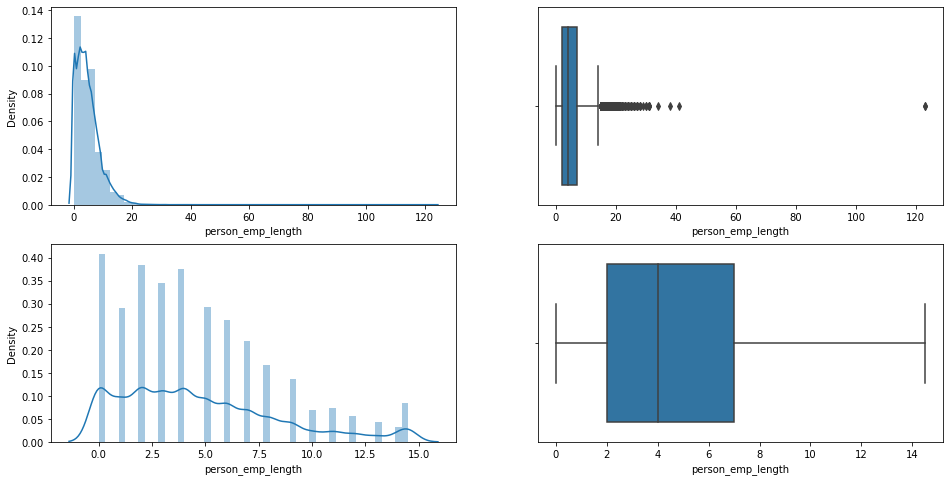

In [112]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(new_data_cap['person_emp_length'])

plt.subplot(2,2,2)
sns.boxplot(new_data_cap['person_emp_length'])

plt.subplot(2,2,3)
sns.distplot(new_data['person_emp_length'])

plt.subplot(2,2,4)
sns.boxplot(new_data['person_emp_length'])

plt.show()

In [113]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  float64
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           32581 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               32581 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 3.0+ MB


### Identify the Target Variable and Splitting the Data into Train and Test

In [114]:
new_data = new_data[['person_age','person_income','person_home_ownership','person_emp_length','loan_intent','loan_grade','loan_amnt',
             'loan_int_rate','loan_percent_income','cb_person_default_on_file','cb_person_cred_hist_length','loan_status']]
new_data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,22,59000.0,RENT,14.5,PERSONAL,D,35000,16.02,0.59,Y,3,1
1,21,9600.0,OWN,5.0,EDUCATION,B,1000,11.14,0.10,N,2,0
2,25,9600.0,MORTGAGE,1.0,MEDICAL,C,5500,12.87,0.57,N,3,1
3,23,65500.0,RENT,4.0,MEDICAL,C,35000,15.23,0.53,N,2,1
4,24,54400.0,RENT,8.0,MEDICAL,C,35000,14.27,0.55,Y,4,1


In [115]:
y = new_data[['loan_status']]
X = new_data[['person_age','person_income','person_home_ownership','person_emp_length','loan_intent','loan_grade','loan_amnt',
             'loan_int_rate','loan_percent_income','cb_person_default_on_file','cb_person_cred_hist_length']]

In [116]:
# Data-preprocessing: Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(24435, 11) (24435, 1)
(8146, 11) (8146, 1)


### Separating Categorical and Numerical Columns

In [117]:
X_train.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
12231,22,80000.0,MORTGAGE,4.0,PERSONAL,A,7250,10.99,0.09,N,3
23891,30,67000.0,MORTGAGE,6.0,HOMEIMPROVEMENT,A,10000,6.99,0.15,N,6
1191,25,59160.0,RENT,0.0,HOMEIMPROVEMENT,E,16600,14.18,0.28,N,4
8463,24,58000.0,MORTGAGE,5.0,DEBTCONSOLIDATION,A,7000,6.99,0.12,N,4
17638,24,46000.0,RENT,0.0,PERSONAL,D,5975,14.46,0.13,Y,4


In [118]:
y_train.head()

,loan_status
12231,0
23891,0
1191,1
8463,0
17638,1


In [119]:
X_train.dtypes

person_age                      int64
person_income                 float64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [120]:
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])

X_train_num.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
12231,22,80000.0,4.0,7250,10.99,0.09,3
23891,30,67000.0,6.0,10000,6.99,0.15,6
1191,25,59160.0,0.0,16600,14.18,0.28,4
8463,24,58000.0,5.0,7000,6.99,0.12,4
17638,24,46000.0,0.0,5975,14.46,0.13,4


In [121]:
X_train_cat = X_train.select_dtypes(include=['object'])

X_train_cat.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
12231,MORTGAGE,PERSONAL,A,N
23891,MORTGAGE,HOMEIMPROVEMENT,A,N
1191,RENT,HOMEIMPROVEMENT,E,N
8463,MORTGAGE,DEBTCONSOLIDATION,A,N
17638,RENT,PERSONAL,D,Y


In [122]:
X_train_cat_nominal = X_train_cat[['person_home_ownership','loan_intent','cb_person_default_on_file']]
X_train_cat_ordinal = X_train_cat[['loan_grade']]

In [123]:
X_train_cat_nominal.head()

,person_home_ownership,loan_intent,cb_person_default_on_file
12231,MORTGAGE,PERSONAL,N
23891,MORTGAGE,HOMEIMPROVEMENT,N
1191,RENT,HOMEIMPROVEMENT,N
8463,MORTGAGE,DEBTCONSOLIDATION,N
17638,RENT,PERSONAL,Y


In [124]:
X_train_cat_ordinal.head()

,loan_grade
12231,A
23891,A
1191,E
8463,A
17638,D


In [125]:
X_train_cat_nominal['person_home_ownership'].value_counts(normalize=True)

RENT        0.505545
MORTGAGE    0.412769
OWN         0.078289
OTHER       0.003397
Name: person_home_ownership, dtype: float64

In [126]:
X_train_cat_nominal['loan_intent'].value_counts(normalize=True)

EDUCATION            0.196849
MEDICAL              0.187600
VENTURE              0.173931
PERSONAL             0.169797
DEBTCONSOLIDATION    0.160467
HOMEIMPROVEMENT      0.111357
Name: loan_intent, dtype: float64

In [127]:
X_train_cat_nominal['cb_person_default_on_file'].value_counts(normalize=True)

N    0.820667
Y    0.179333
Name: cb_person_default_on_file, dtype: float64

In [128]:
# OneHotEncoding the categorical features

from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(drop='first', sparse=False)

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_cat_ohe = pd.DataFrame(ohe.fit_transform(X_train_cat_nominal), 
                               columns=ohe.get_feature_names_out(X_train_cat_nominal.columns), 
                               index = X_train_cat_nominal.index)

X_train_cat_ohe.head()

,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y
12231,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
23891,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1191,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
8463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17638,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [129]:
X_train_cat_le = pd.DataFrame(index=X_train_cat_ordinal.index)

X_train_cat_le.head()

""
12231
23891
1191
8463
17638


In [130]:
X_train_cat_ordinal.loan_grade.unique()

array(['A', 'E', 'D', 'B', 'C', 'F', 'G'], dtype=object)

In [131]:
loangrade_encoder = {'G' : 1, 'F' : 2, 'E' : 3, 'D' : 4, 'C' : 5, 'B' : 6, 'A' : 7}

X_train_cat_le['loan_grade'] = X_train_cat_ordinal['loan_grade'].apply(lambda x : loangrade_encoder[x])

X_train_cat_le.head()

,loan_grade
12231,7
23891,7
1191,3
8463,7
17638,4


In [132]:
X_train_cat_transformed = pd.concat([X_train_cat_ohe, X_train_cat_le], axis=1)

X_train_cat_transformed.head()

,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y,loan_grade
12231,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7
23891,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,7
1191,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3
8463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
17638,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,4


In [133]:
# scaling the numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_num_rescaled = pd.DataFrame(scaler.fit_transform(X_train_num),columns = X_train_num.columns,index = X_train_num.index)

X_train_num_rescaled.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
12231,-0.905024,0.547207,-0.188496,-0.372728,-0.006185,-0.751368,-0.690988
23891,0.360863,0.140282,0.347869,0.062224,-1.306021,-0.190787,0.050929
1191,-0.430316,-0.105125,-1.261226,1.106109,1.030435,1.023804,-0.443682
8463,-0.588552,-0.141435,0.079686,-0.412269,-1.306021,-0.471077,-0.443682
17638,-0.588552,-0.517058,-1.261226,-0.574387,1.121423,-0.377647,-0.443682


In [134]:
X_train_num_rescaled.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
count,2.443500e+04,2.443500e+04,2.443500e+04,2.443500e+04,2.443500e+04,2.443500e+04,2.443500e+04
mean,-6.152003e-18,-5.121520e-17,7.377406e-17,2.561441e-18,1.695754e-16,3.149153e-16,-2.478158e-16
std,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00
min,-1.221495e+00,-1.831737e+00,-1.261226e+00,-1.440337e+00,-1.816206e+00,-1.592239e+00,-9.382934e-01
25%,-7.467877e-01,-7.518217e-01,-7.248609e-01,-7.285976e-01,-8.185820e-01,-7.513678e-01,-6.909879e-01
50%,-2.720802e-01,-2.353405e-01,-1.884960e-01,-2.541046e-01,-6.184528e-03,-1.907871e-01,-4.436824e-01
75%,3.608632e-01,5.340599e-01,6.160513e-01,4.299562e-01,6.827286e-01,5.566538e-01,5.455397e-01
max,1.839975e+01,2.433146e+00,2.627420e+00,4.016333e+00,3.607360e+00,5.695310e+00,5.986261e+00


### Concatinating the Encoded Categorical Features and Rescaled Numerical Features:

In [135]:
X_train_transformed = pd.concat([X_train_num_rescaled, X_train_cat_transformed], axis=1)

X_train_transformed.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y,loan_grade
12231,-0.905024,0.547207,-0.188496,-0.372728,-0.006185,-0.751368,-0.690988,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7
23891,0.360863,0.140282,0.347869,0.062224,-1.306021,-0.190787,0.050929,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,7
1191,-0.430316,-0.105125,-1.261226,1.106109,1.030435,1.023804,-0.443682,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3
8463,-0.588552,-0.141435,0.079686,-0.412269,-1.306021,-0.471077,-0.443682,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
17638,-0.588552,-0.517058,-1.261226,-0.574387,1.121423,-0.377647,-0.443682,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,4


### Preparing Test Data

In [136]:
X_test.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
2124,24,41300.0,RENT,2.0,EDUCATION,C,2400,12.68,0.06,N,2
252,24,85000.0,RENT,5.0,MEDICAL,B,25000,10.62,0.29,N,4
13083,24,88000.0,MORTGAGE,4.0,MEDICAL,B,6000,9.91,0.07,N,2
12447,23,81120.0,MORTGAGE,3.0,PERSONAL,B,15000,10.25,0.18,N,4
31009,39,73000.0,MORTGAGE,3.0,VENTURE,A,10000,7.51,0.14,N,14


In [137]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8146 entries, 2124 to 709
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  8146 non-null   int64  
 1   person_income               8146 non-null   float64
 2   person_home_ownership       8146 non-null   object 
 3   person_emp_length           8146 non-null   float64
 4   loan_intent                 8146 non-null   object 
 5   loan_grade                  8146 non-null   object 
 6   loan_amnt                   8146 non-null   int64  
 7   loan_int_rate               8146 non-null   float64
 8   loan_percent_income         8146 non-null   float64
 9   cb_person_default_on_file   8146 non-null   object 
 10  cb_person_cred_hist_length  8146 non-null   int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 763.7+ KB


In [138]:
X_test.dtypes

person_age                      int64
person_income                 float64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [139]:
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

X_test_num.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
2124,24,41300.0,2.0,2400,12.68,0.06,2
252,24,85000.0,5.0,25000,10.62,0.29,4
13083,24,88000.0,4.0,6000,9.91,0.07,2
12447,23,81120.0,3.0,15000,10.25,0.18,4
31009,39,73000.0,3.0,10000,7.51,0.14,14


In [140]:
X_test_cat = X_test.select_dtypes(include=['object'])

X_test_cat.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
2124,RENT,EDUCATION,C,N
252,RENT,MEDICAL,B,N
13083,MORTGAGE,MEDICAL,B,N
12447,MORTGAGE,PERSONAL,B,N
31009,MORTGAGE,VENTURE,A,N


In [141]:
X_test_cat_nominal = X_test_cat[['person_home_ownership','loan_intent','cb_person_default_on_file']]
X_test_cat_ordinal = X_test_cat[['loan_grade']]

In [142]:
X_test_cat_nominal.head()

,person_home_ownership,loan_intent,cb_person_default_on_file
2124,RENT,EDUCATION,N
252,RENT,MEDICAL,N
13083,MORTGAGE,MEDICAL,N
12447,MORTGAGE,PERSONAL,N
31009,MORTGAGE,VENTURE,N


In [143]:
X_test_cat_ordinal.head()

,loan_grade
2124,C
252,B
13083,B
12447,B
31009,A


In [144]:
X_test_cat_le = pd.DataFrame(index = X_test_cat_ordinal.index)

X_test_cat_le.head()

""
2124
252
13083
12447
31009


In [145]:
X_test_cat_le['loan_grade'] = X_test_cat_ordinal['loan_grade'].apply(lambda x : loangrade_encoder[x])

X_test_cat_le.head()

,loan_grade
2124,5
252,6
13083,6
12447,6
31009,7


In [146]:
X_test_cat_ohe = pd.DataFrame(ohe.transform(X_test_cat_nominal),columns=ohe.get_feature_names_out(X_test_cat_nominal.columns),index = X_test_cat_nominal.index)
X_test_cat_ohe.head()

,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y
2124,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
252,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
13083,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
12447,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
31009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [147]:
X_test_cat_transformed = pd.concat([X_test_cat_ohe, X_test_cat_le], axis=1)

X_test_cat_transformed.head()

,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y,loan_grade
2124,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,5
252,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,6
13083,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6
12447,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6
31009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,7


In [148]:
X_test_num_rescaled = pd.DataFrame(scaler.transform(X_test_num),columns = X_test_num.columns,index = X_test_num.index)

X_test_num_rescaled.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
2124,-0.588552,-0.664176,-0.724861,-1.139825,0.542996,-1.031658,-0.938293
252,-0.588552,0.703716,0.079686,2.434689,-0.126419,1.117235,-0.443682
13083,-0.588552,0.797622,-0.188496,-0.570433,-0.357140,-0.938228,-0.938293
12447,-0.746788,0.582265,-0.456678,0.853046,-0.246654,0.089503,-0.443682
31009,1.784986,0.328093,-0.456678,0.062224,-1.137042,-0.284217,2.029373


In [149]:
X_test_transformed = pd.concat([X_test_num_rescaled, X_test_cat_transformed], axis=1)

X_test_transformed.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y,loan_grade
2124,-0.588552,-0.664176,-0.724861,-1.139825,0.542996,-1.031658,-0.938293,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,5
252,-0.588552,0.703716,0.079686,2.434689,-0.126419,1.117235,-0.443682,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,6
13083,-0.588552,0.797622,-0.188496,-0.570433,-0.357140,-0.938228,-0.938293,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6
12447,-0.746788,0.582265,-0.456678,0.853046,-0.246654,0.089503,-0.443682,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6
31009,1.784986,0.328093,-0.456678,0.062224,-1.137042,-0.284217,2.029373,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,7


### Logistic Regression

In [266]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_transformed, y_train)

LogisticRegression()

In [267]:
y_test_pred = lr.predict(X_test_transformed)

In [268]:
from sklearn.metrics import accuracy_score

lr_score = accuracy_score(y_test, y_test_pred)
lr_score

0.8579671004173828

### KNN Classification

In [269]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_transformed, y_train)

KNeighborsClassifier()

In [270]:
y_test_pred = knn.predict(X_test_transformed)

In [272]:
from sklearn.metrics import accuracy_score

knn_score = accuracy_score(y_test, y_test_pred)
knn_score

0.8919715197643014

### Decision Tree Classifier

In [276]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train_transformed, y_train)

DecisionTreeClassifier()

In [277]:
y_test_pred = dtc.predict(X_test_transformed)

In [278]:
from sklearn.metrics import accuracy_score

dtc_score = accuracy_score(y_test, y_test_pred)
dtc_score

0.8940584335870366

### Naive Bayes Classification

In [282]:
from sklearn.naive_bayes import GaussianNB
nbc = GaussianNB()
nbc.fit(X_train_transformed, y_train)

GaussianNB()

In [283]:
y_test_pred = nbc.predict(X_test_transformed)

In [284]:
from sklearn.metrics import accuracy_score

nbc_score = accuracy_score(y_test, y_test_pred)
nbc_score

0.8254357967100417

### Support Vector Classifier

In [285]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train_transformed, y_train)

SVC()

In [286]:
y_test_pred = svc.predict(X_test_transformed)

In [287]:
from sklearn.metrics import accuracy_score

svc_score = accuracy_score(y_test, y_test_pred)
svc_score

0.9015467714215566

### Random Forest Classifier

In [292]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train_transformed, y_train)

RandomForestClassifier()

In [293]:
y_test_pred = rfc.predict(X_test_transformed)

In [294]:
from sklearn.metrics import accuracy_score

rfc_score = accuracy_score(y_test, y_test_pred)
rfc_score

0.9346918733120549

### Gradient Boost Classifier

In [295]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train_transformed, y_train)

GradientBoostingClassifier()

In [296]:
y_test_pred = gbc.predict(X_test_transformed)

In [297]:
from sklearn.metrics import accuracy_score

gbc_score = accuracy_score(y_test, y_test_pred)
gbc_score

0.9249938620181685

In [301]:
models = [('Logistic Regression',lr_score),
          ('KNN Clasification',knn_score),
          ('Decision Tree Classification',dtc_score),
          ('Naive Bayes Classification',nbc_score),
          ('Support Vector Classification',svc_score),
          ('Random Forest Classification',rfc_score),
          ('Gradient Boosting Classification',gbc_score)]

In [304]:
predict = pd.DataFrame(data = models, columns=['Algorithm','Accuracy_score'])
predict.sort_values(by = 'Accuracy_score', ascending = False)

,Algorithm,Accuracy_score
5,Random Forest Classification,0.934692
6,Gradient Boosting Classification,0.924994
4,Support Vector Classification,0.901547
2,Decision Tree Classification,0.894058
1,KNN Clasification,0.891972
0,Logistic Regression,0.857967
3,Naive Bayes Classification,0.825436


<AxesSubplot:xlabel='Accuracy_score', ylabel='Algorithm'>

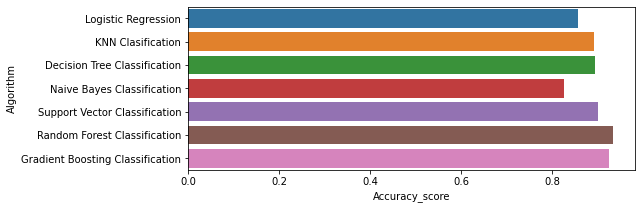

In [305]:
plt.figure(figsize = (8,3))
sns.barplot(x = predict['Accuracy_score'], y = predict['Algorithm'])

# conclusion

### In this ML model the Random Forest classification model provides the maximum accuracy of 93.4%,so random forest method is the best model for this loan prediction model